# Setup

* Clone github repository

In [ ]:
!git clone https://github.com/BeppeMaxCaru/AMD_DeepLearning.git

Cloning into 'AMD_DeepLearning'...
remote: Enumerating objects: 74, done.
remote: Counting objects: 100% (74/74), done.
remote: Compressing objects: 100% (61/61), done.
remote: Total 74 (delta 23), reused 27 (delta 9), pack-reused 0
Unpacking objects: 100% (74/74), done.


* Download and import libraries

In [ ]:
!pip install kaggle
!pip install livelossplot

import zipfile
import json
import pandas as pd
import numpy as np
import random
from livelossplot import PlotLossesKeras
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from keras import layers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 793 kB 5.3 MB/s 
     |████████████████████████████████| 381 kB 40.7 MB/s 
  Attempting uninstall: prompt-toolkit
    Found existing installation: prompt-toolkit 1.0.18
    Uninstalling prompt-toolkit-1.0.18:
      Successfully uninstalled prompt-toolkit-1.0.18
  Attempting uninstall: ipython
    Found existing installation: ipython 5.5.0
    Uninstalling ipython-5.5.0:
      Successfully uninstalled ipython-5.5.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
jupyter-console 5.2.0 requires prompt-toolkit<2.0.0,>=1.0.0, but you have prompt-toolkit 3.0.30 which is incompatible.
google-colab 1.0.0 requires ipython~=5.5.0, but yo

* Extract hashtags to predict

In [ ]:
hashtags_json = json.load(open('/content/AMD_DeepLearning/src/top_hashtags_index.json'))

hashtags_list = list(hashtags_json.items())
hashtags_list.sort(key = lambda pair: pair[1])
TOP_HASHTAGS = [elem[0] for elem in hashtags_list]

['ukraine',
 'russia',
 'standwithukraine',
 'putin',
 'russian',
 'mariupol',
 'ukrainerussiawar',
 'nato',
 'tigray',
 'ukrainewar',
 'kyiv',
 'ukrainian',
 'stoprussia',
 'news',
 'armukrainenow',
 'russiaukrainewar',
 'usa',
 'stopputin',
 'kharkiv',
 'slavaukraini',
 'bucha',
 'ukrainerussianwar',
 'biden',
 'ukraineunderattack',
 'business',
 'war',
 'russianukrainianwar',
 'stopputinnow',
 'azovstal',
 'eu',
 'ukraine️',
 'kherson',
 'anonymous',
 'standwithukraine️',
 'russianwarcrimes',
 'china',
 'us',
 'tigraygenocide',
 'russians',
 'zelensky',
 'russianarmy',
 'europe',
 'endtigraysiege',
 'nft',
 'russiaukraine',
 'belarus',
 'breaking',
 'ukrainerussia',
 'ethiopia',
 'poland',
 'buchamassacre',
 'ukraineunderattaсk',
 'warcrimes',
 'freeukraine',
 'germany',
 'zelenskyy',
 'safeairliftukraine',
 'donetsk',
 'donbass',
 'putinisawarcriminal',
 'stopwar',
 'ukrainians',
 'moscow',
 'kiev',
 'ukraineinvasion',
 'stoprussianaggression',
 'putinwarcriminal',
 'finland',
 'tr

* Set Kaggle API Token

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle
!chmod 600 ~/.kaggle/kaggle.json

cp: cannot stat 'kaggle.json': No such file or directory


* Import dataset from Kaggle

In [ ]:
!kaggle datasets download -d k4ggl3gpu/algorithmsformassivedataset20212022dataset

zipped_dataset = '/content/algorithmsformassivedataset20212022dataset.zip'

100% 644M/647M [00:05<00:00, 175MB/s]
100% 647M/647M [00:05<00:00, 121MB/s]


* Unzip and check dataset

In [ ]:
zf = zipfile.ZipFile(zipped_dataset)

#Check all files inside zip folder
print(zf.namelist())
#Open and read csv file
df_dataset = pd.read_csv(zf.open('dataset.csv'), header=None)
df_dataset = df_dataset.astype('string')
df_dataset = df_dataset.fillna('')

print(df_dataset.dtypes)
print(df_dataset.info())
print(df_dataset.sample(10))

['dataset.csv']
0    string
1    string
dtype: object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26700388 entries, 0 to 26700387
Data columns (total 2 columns):
 #   Column  Dtype 
---  ------  ----- 
 0   0       string
 1   1       string
dtypes: string(2)
memory usage: 407.4 MB
None
                                                          0        1
25708214                                     combat footage    0 1 5
2473967      awol brit gone soldiers fight orders disobeyed        0
24508791        patriotism garbage problems region disposal        1
23136164  talks lavrov try qureshi replace make tried pa...        0
18592971  bilateral sullivan tell foreign brink ministry...        1
16674235  animals fb critical another doctors nv killing...       15
10336518  new place lavrov meeting foreign russian april...       27
24359540  japanese money platform way changing earn prov...       66
19600116  assistance needs weapon stop provide civilian ...  3 25 47
23663505  finlan

# Configuration parameters

* Fine tune neural networks

In [ ]:
#Slice of dataset to use
first_tweet = 5000000
last_tweet = 15750000

#Embedding neural network parameters
embedding_neural_network_vectorization_layer_output_tokens = 50
embedding_neural_network_words_dictionary_size = 10000
embedding_neural_network_words_embedding_dimensions = int(embedding_neural_network_words_dictionary_size ** 0.25)

#Embedding neural network to process input data

* Embedding neural network input layer

In [ ]:
embedding_neural_network_input_layer = tf.keras.layers.InputLayer(
    input_shape=(1,1),
    dtype=tf.string
    )

* Embedding neural network text vectorization layer

In [ ]:
embedding_neural_network_text_vectorization_layer = tf.keras.layers.TextVectorization(
    max_tokens=embedding_neural_network_words_dictionary_size, #Limits learned vocabulary to top 10000 most frequent tokens
    standardize='lower_and_strip_punctuation', #All words become lowercase and punctuation is removed
    split='whitespace', #Splits input string into tokens using whitespace as delimiter
    output_mode='int', #Output encoding type
    output_sequence_length=embedding_neural_network_vectorization_layer_output_tokens #Number of output tokens
    )

embedding_neural_network_text_vectorization_layer.adapt(df_dataset.iloc[first_tweet:last_tweet, 0:1])

embedding_neural_network_vectorization_layer_vocabulary_lenght = len(embedding_neural_network_text_vectorization_layer.get_vocabulary())

* Embedding neural network embedding layer

In [ ]:
embedding_neural_network_embedding_layer = tf.keras.layers.Embedding(
    input_dim=embedding_neural_network_vectorization_layer_vocabulary_lenght,
    output_dim=embedding_neural_network_words_embedding_dimensions,
    input_length=embedding_neural_network_vectorization_layer_output_tokens
    )

* Embedding neural network flattening layer

In [ ]:
embedding_neural_network_flattening_layer = tf.keras.layers.Flatten()

* Embedding neural network model

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 text_vectorization (TextVec  (None, 1, 50)            0         
 torization)                                                     
                                                                 
 embedding (Embedding)       (None, 1, 50, 10)         100000    
                                                                 
 flatten (Flatten)           (None, 500)               0         
                                                                 
Total params: 100,000
Trainable params: 100,000
Non-trainable params: 0
_________________________________________________________________


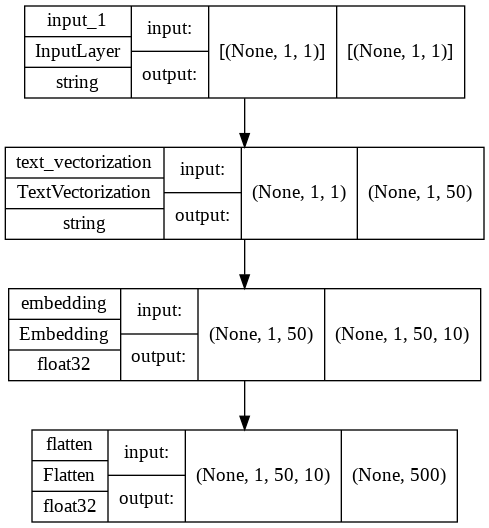

In [ ]:
embedding_neural_network = tf.keras.Sequential([
                             embedding_neural_network_input_layer,
                             embedding_neural_network_text_vectorization_layer,
                             embedding_neural_network_embedding_layer,
                             embedding_neural_network_flattening_layer,
                             #tf.keras.layers.GlobalAveragePooling2D()
                             ])

embedding_neural_network.compile(
    optimizer='adam',
    loss='mean_squared_error',
    metrics=['accuracy']
    )

embedding_neural_network.summary()

tf.keras.utils.plot_model(
    embedding_neural_network,
    to_file="Embedding neural network.png", 
    show_shapes=True, 
    show_dtype=True, 
    show_layer_names=True, 
    show_layer_activations=True
    )

* Embedding neural network output used as input for the forecasting neural network

In [ ]:
forecasting_neural_network_input_data = embedding_neural_network.predict(df_dataset.iloc[first_tweet:last_tweet, 0:1])

# Expected output labels decompression

* Labels decompressing function

In [ ]:
#Expand second column of dataset
def from_indices_to_boolean_vector(indices):
    indices = str(indices.values[0])
    pads = [0 for _ in range(len(TOP_HASHTAGS))]
    if not indices:
      return pads
    indices = [int(x) for x in indices.split(' ')]
    for index in indices:
      pads[index] = 1
    return pads

* Labels decompressed as expected output for the forecasting neural network

In [ ]:
forecasting_neural_network_expected_output_labels = df_dataset.iloc[first_tweet:last_tweet, 1:2].apply(from_indices_to_boolean_vector, axis=1, result_type='expand')

# Forecasting neural network

* Forecasting neural network input and output shapes

In [ ]:
forecasting_neural_network_input_shape = forecasting_neural_network_input_data.shape[1]
forecasting_neural_network_output_shape = len(TOP_HASHTAGS)

* Forecasting neural network input layer

In [ ]:
forecasting_neural_network_input_layer = tf.keras.layers.InputLayer(
    input_shape=(forecasting_neural_network_input_shape),
    )

* Forecasting neural network model

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 250)               125250    
                                                                 
 dense_1 (Dense)             (None, 125)               31375     
                                                                 
 dense_2 (Dense)             (None, 100)               12600     
                                                                 
Total params: 169,225
Trainable params: 169,225
Non-trainable params: 0
_________________________________________________________________


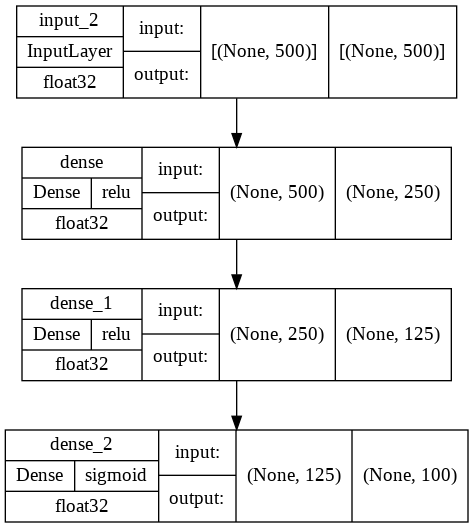

In [ ]:
forecasting_neural_network = tf.keras.Sequential([
                          forecasting_neural_network_input_layer,
                          #tf.keras.layers.Dense(256, activation='relu'),   
                          #tf.keras.layers.Dense(128, activation='relu'),
                          tf.keras.layers.Dense((forecasting_neural_network_input_shape / 2), activation='relu'),
                          tf.keras.layers.Dense((forecasting_neural_network_input_shape / 4), activation='relu'),
                          tf.keras.layers.Dense(forecasting_neural_network_output_shape, activation='sigmoid')
                          ])

forecasting_neural_network.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['binary_accuracy']
    )

#forecasting_neural_network.build()

forecasting_neural_network.summary()

tf.keras.utils.plot_model(
    forecasting_neural_network,
    to_file="Forecasting neural network.png", 
    show_shapes=True, 
    show_dtype=True, 
    show_layer_names=True, 
    show_layer_activations=True
    )

# Training

* Split dataset into training and test data

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(forecasting_neural_network_input_data, forecasting_neural_network_expected_output_labels, test_size=0.3, random_state=random.randint(0, 100))

* Forecasting neural network training

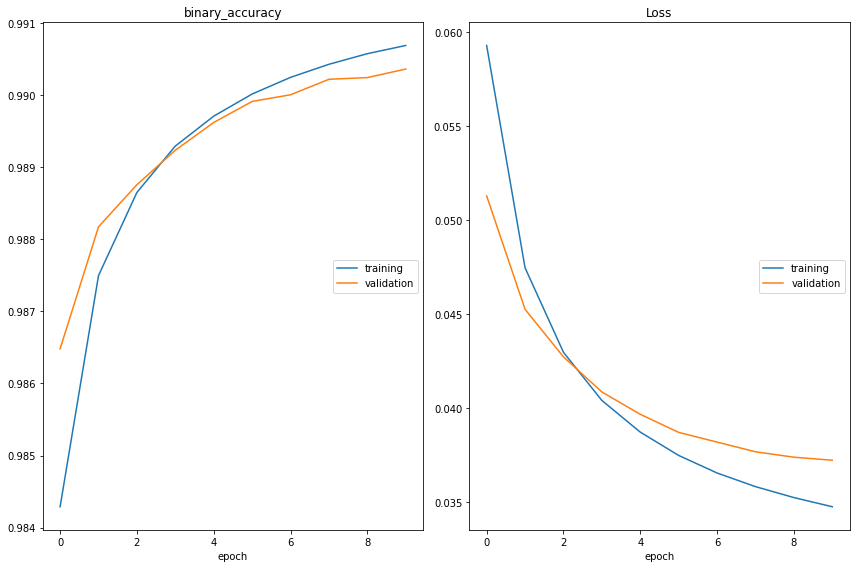

binary_accuracy
	training         	 (min:    0.984, max:    0.991, cur:    0.991)
	validation       	 (min:    0.986, max:    0.990, cur:    0.990)
Loss
	training         	 (min:    0.035, max:    0.059, cur:    0.035)
	validation       	 (min:    0.037, max:    0.051, cur:    0.037)
13125/13125 [==============================] - 52s 4ms/step - loss: 0.0347 - binary_accuracy: 0.9907 - val_loss: 0.0372 - val_binary_accuracy: 0.9904


In [ ]:
#Train model
forecasting_neural_network.fit(
    x=X_train, y=Y_train,
    validation_split=0.2,
    epochs=10,
    shuffle=True,
    callbacks=[PlotLossesKeras()]
    )

# Testing

* Forecasting neural network testing

In [ ]:
#Test model
forecasting_neural_network.evaluate(
    x=X_test, y=Y_test,
    )

7032/7032 [==============================] - 13s 2ms/step - loss: 0.0369 - binary_accuracy: 0.9904


[0.03685355558991432, 0.9904447197914124]